In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_datasets(filename):
    
    df = pd.read_csv(filename, delimiter=',')
    X, y = df["A"], df["B"]
    return X, y

In [3]:
def split_datasets(X, y, test_size = 0.2):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [4]:
def plot_data(X_train, X_test, y_train, y_test):
    
    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    plt.show()

In [5]:
def normalize(X):
    
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0, ddof=1)
    X_norm = (X - mean) / std
    return X_norm, mean, std

In [6]:
def prepare_X(X):

    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [7]:
def hypothesis(X, theta):
    
    h_thetha = X.dot(theta);
    return h_thetha

In [8]:
def cost_function(X, y, theta):
   
    m = X.shape[0]
    J = 0
    if m == 0:
        return None
    else:
        J = np.sum(((hypothesis(X, theta) - y) ** 2))
        return J/(2*m)

In [9]:
def normal_eqn(X, y):
    theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [10]:
def derivative(X, y, theta):
    
    m = X.shape[0]
    d_thetha = (-2/m)*(y - hypothesis(X, theta) )
    return d_thetha

In [11]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        theta = theta -(1/m)*alpha*( X.T.dot((hypothesis(X, theta) - y)))
        J = cost_function(X, y, theta)
        ######################
        if print_J == True:
            print(J)
        J_history.append(J)
    return theta, J_history

In [12]:
def plot_J(X, y):

    theta_0 = np.linspace(-10, 10, 100)
    theta_1 = np.linspace(-1, 4, 100)
    
    J_vals = np.zeros((len(theta_0), len(theta_1)))
    for i, t0 in enumerate(theta_0):
        for j, t1 in enumerate(theta_1):
            theta = np.array([t0, t1])
            J_vals[i, j] = cost_function(X, y, theta)
    
    J_vals = J_vals.T
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(theta_0, theta_1, J_vals, color='b')
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Surface plot of the cost function')
    plt.show()
    plt.contour(theta_0, theta_1, J_vals, np.logspace(-2, 3, 20))
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Contour plot of the cost function')
    plt.show()

In [13]:
X, y = load_datasets('burrito.csv')
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(97,), y=(97,)


In [14]:
X_train, X_test, y_train, y_test = split_datasets(X, y, 0.2)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(77,), y=(77,)
Test set: X=(20,), y=(20,)


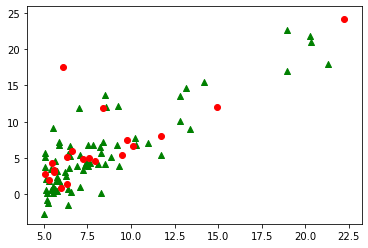

In [15]:
plot_data(X_train, X_test, y_train, y_test)

In [16]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train)
theta = np.array([0, 0])

In [17]:
y = y_train[:]

In [18]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))

X: (77, 2)
y: (77,)
30.269885364051298


In [19]:
alpha = 0.02
num_iters = 1500

In [20]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1]))
theta_res = normal_eqn(X, y)
print('Theta 0: {}; Theta 1: {}'.format(theta_res[0],theta_res[1]))

Theta 0: -4.32000073425032; Theta 1: 1.2222826959741535
Theta 0: -4.340297863395314; Theta 1: 1.2243393238831468


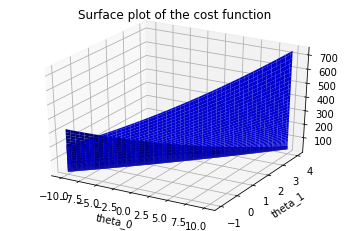

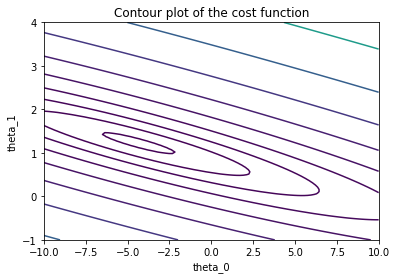

In [21]:
plot_J(X, y)

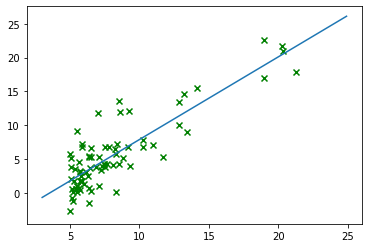

In [22]:
x = np.arange(3, 25, 0.1)
h = new_theta[0] + new_theta[1]*x

plt.plot(x, h)
plt.scatter(X_train, y_train, marker='x', c='green')

plt.show()

In [23]:
####################
# Нормалізувати тестовий датасет, використовуючи mean, std з тренувального
####################
#X_test_proc = (X_test_proc - mean) / std
X_test_proc = prepare_X(X_test)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) *100
diff = np.abs(y_test - y_test_pred)
res = pd.DataFrame({'X' : X_test, 'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : diff})
print(res)
print(cost_function(X_test_proc, y_test, new_theta))

          X  y_actual     y_pred        err
24   5.5649   3.08250   2.481880   0.600620
53   7.6031   4.99810   4.973137   0.024963
37   5.6063   3.39280   2.532483   0.860317
63  14.9080  12.05400  13.901790   1.847790
54   6.3328   1.42330   3.420471   1.997171
22   5.4901   4.26300   2.390453   1.872547
89   5.0594   2.82140   1.864016   0.957384
70  10.1360   6.67990   8.069057   1.389157
31   6.5894   5.99660   3.734109   2.262491
83   9.7687   7.54350   7.620112   0.076612
23   6.3261   5.18750   3.412282   1.775218
87   6.0020   0.92695   3.016140   2.089190
5    8.3829  11.88600   5.926273   5.959727
59   9.4536   5.41410   7.234971   1.820871
0    6.1101  17.59200   3.148269  14.443731
93   5.3054   1.98690   2.164698   0.177798
35   7.9334   4.56230   5.376857   0.814557
29  22.2030  24.14700  22.818342   1.328658
48  11.7000   8.00430   9.980707   1.976407
65   7.2182   4.88520   4.502680   0.382520
7.03665987867669
